# Task1: ML application

Build more than two machine learning models for each dataset using Scikit-learn, covering Classification, Regression, and Clustering tasks. You need to create the entire pipeline, including dataset loading, preprocessing, model training, and evaluation.

1- Dataset(Classification): https://www.kaggle.com/datasets/shrutimechlearn/steel-plate-fault

2- Dataset(Regression): https://www.kaggle.com/datasets/mirichoi0218/insurance

3- Dataset(Clustering): https://www.kaggle.com/datasets/alirezachahardoli/customer-data-clustring/data

# **Classification:**

In [1]:
from IPython.display import clear_output

In [2]:
!pip install opendatasets
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download shrutimechlearn/steel-plate-fault
!unzip /content/steel-plate-fault.zip
clear_output()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [7]:
# Path to the uploaded Excel file in Google Colab
file_path = '/content/faults.csv'  # Update this if the file name is different

# Load the dataset
df = pd.read_csv(file_path)

df.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [8]:
# Check for missing values
df.isnull().sum()

X_Minimum                 0
X_Maximum                24
Y_Minimum                 0
Y_Maximum                 0
Pixels_Areas              0
X_Perimeter               0
Y_Perimeter               0
Sum_of_Luminosity         0
Minimum_of_Luminosity     0
Maximum_of_Luminosity     0
Length_of_Conveyer        0
TypeOfSteel_A300          0
TypeOfSteel_A400          0
Steel_Plate_Thickness    30
Edges_Index               0
Empty_Index              26
Square_Index              0
Outside_X_Index           0
Edges_X_Index             0
Edges_Y_Index             0
Outside_Global_Index      0
LogOfAreas                0
Log_X_Index               0
Log_Y_Index               0
Orientation_Index         0
Luminosity_Index          0
SigmoidOfAreas            0
target                    0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

In [10]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f'Duplicate Records: {duplicate_records}')

Duplicate Records: 0


In [12]:
# Assuming no missing values, we proceed to feature scaling
scaler = StandardScaler()
features = df.drop(columns=['target'])  # Replace 'Class' with the actual target column name
target = df['target']

# Standardize the features
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [15]:
# Train a Logistic Regression model with increased iterations
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='weighted'))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Bumps       0.63      0.61      0.62        76
   Dirtiness       0.55      0.60      0.57        10
    K_Scatch       0.96      0.93      0.94        95
Other_Faults       0.64      0.63      0.64       128
      Pastry       0.50      0.44      0.47        18
      Stains       0.83      1.00      0.91        10
   Z_Scratch       0.77      0.92      0.84        37

    accuracy                           0.73       374
   macro avg       0.70      0.73      0.71       374
weighted avg       0.73      0.73      0.73       374

Accuracy: 0.7299465240641712
Precision: 0.7284076960983893
Recall: 0.7299465240641712
F1 Score: 0.7281102831916253


In [16]:
# Train a Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest Classification Report:
              precision    recall  f1-score   support

       Bumps       0.70      0.76      0.73        76
   Dirtiness       0.89      0.80      0.84        10
    K_Scatch       0.97      0.97      0.97        95
Other_Faults       0.75      0.76      0.75       128
      Pastry       0.67      0.44      0.53        18
      Stains       1.00      0.90      0.95        10
   Z_Scratch       0.94      0.92      0.93        37

    accuracy                           0.82       374
   macro avg       0.84      0.79      0.81       374
weighted avg       0.82      0.82      0.82       374

Accuracy: 0.8181818181818182
Precision: 0.8193835812191589
Recall: 0.8181818181818182
F1 Score: 0.817259607387085


In [19]:
# Train a K-Nearest Neighbors model
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

       Bumps       0.62      0.83      0.71        76
   Dirtiness       0.67      0.80      0.73        10
    K_Scatch       0.95      0.95      0.95        95
Other_Faults       0.78      0.63      0.70       128
      Pastry       0.60      0.33      0.43        18
      Stains       0.91      1.00      0.95        10
   Z_Scratch       0.83      0.92      0.87        37

    accuracy                           0.78       374
   macro avg       0.77      0.78      0.76       374
weighted avg       0.79      0.78      0.78       374

Accuracy: 0.7807486631016043
Precision: 0.7870020076823828
Recall: 0.7807486631016043
F1 Score: 0.7760648075596648


In [20]:
# Initialize lists to store metric scores
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate models
for model_name, model in zip(models, [LogisticRegression(max_iter=1000, solver='lbfgs'),
                                      RandomForestClassifier(),
                                      KNeighborsClassifier(n_neighbors=5)]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

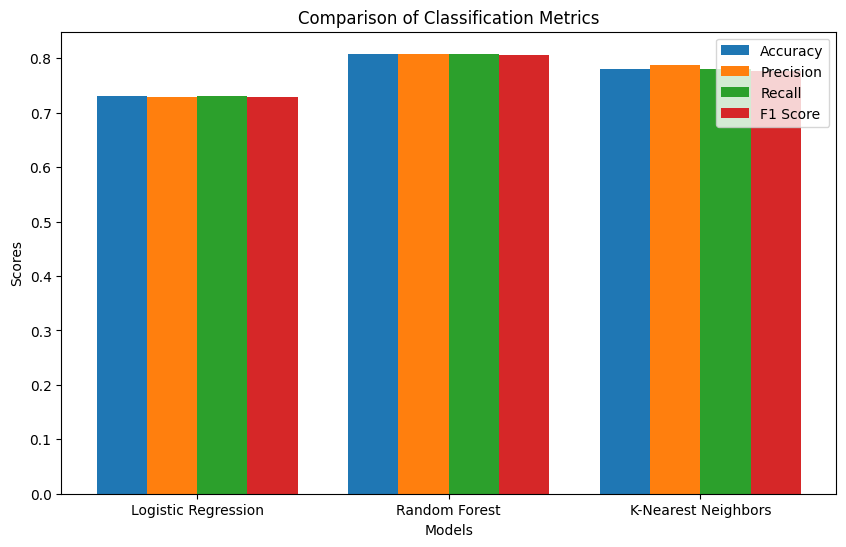

In [21]:
# Plotting the metrics
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# **Regression:**

In [23]:
!pip install opendatasets
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mirichoi0218/insurance
!unzip /content/insurance.zip
clear_output()

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
data = pd.read_csv('/content/insurance.csv')
# Display the first few rows and check the columns
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
data = data.dropna()

In [28]:
data.duplicated().sum()

1

In [29]:
data = data.drop_duplicates()

In [31]:
# Separate features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [33]:
# Step 3: Building Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

regressors = {}
for model_name, model in models.items():
    regressors[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

In [34]:
# Lists to store metrics
model_names = []

rmse_scores = []
r2_scores = []
mean_values = []


for model_name, regressor in regressors.items():
    print(f"Training {model_name}: ")
    regressor.fit(X_train, y_train)
    print("Model trained.")

    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mean_pred = np.mean(y_pred)

    # Store metrics
    model_names.append(model_name)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mean_values.append(mean_pred)

    print(f"Metrics for {model_name}:")
    print(f"  Mean: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R^2 Score: {r2}")
    print()

    if model_name == 'Random Forest Regression':


        # Extract feature names after one-hot encoding
        categorical_encoder = regressor.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
        feature_names = categorical_features
        feature_names = numeric_features + feature_names

        feature_importances = regressor.named_steps['regressor'].feature_importances_
        print("Random Forest Feature Importances:")
        for i, feature_name in enumerate(feature_names):
            print(f"{feature_name}: {feature_importances[i]}")
        print()

Training Linear Regression: 
Model trained.
Metrics for Linear Regression:
  Mean: 35478020.67523559
  RMSE: 5956.342894363587
  R^2 Score: 0.8069287081198012

Training Random Forest Regression: 
Model trained.
Metrics for Random Forest Regression:
  Mean: 21891894.305729106
  RMSE: 4678.877462140797
  R^2 Score: 0.8808643708169941

Random Forest Feature Importances:
age: 0.13550707918024485
bmi: 0.21189076118451716
children: 0.02276084860494044
sex: 0.004711987409995583
smoker: 0.00433632445210942
region: 0.4446672945393549

Training Gradient Boosting Regression: 
Model trained.
Metrics for Gradient Boosting Regression:
  Mean: 18249080.633463815
  RMSE: 4271.894267589475
  R^2 Score: 0.9006885528992274



In [35]:
from sklearn.preprocessing import MinMaxScaler

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores,
    'Mean': mean_values
})

# Normalize the metrics
scaler = MinMaxScaler()
metrics_df[['RMSE', 'R2 Score', 'Mean']] = scaler.fit_transform(metrics_df[['RMSE', 'R2 Score', 'Mean']])


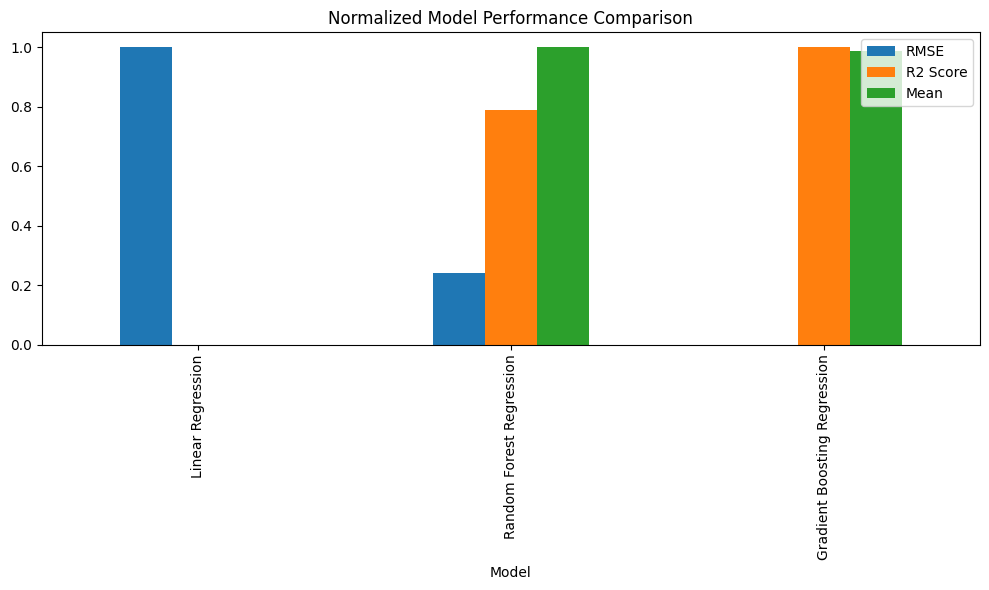

In [36]:
# Plotting normalized RMSE, R^2 scores, and Mean
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for normalized metrics
metrics_df.set_index('Model').plot(kind='bar', ax=ax)

# Add title and labels
plt.title('Normalized Model Performance Comparison')


plt.tight_layout()
plt.show()

# **Clustering**

In [37]:
!pip install opendatasets
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download alirezachahardoli/customer-data-clustring
!unzip /content/customer-data-clustring.zip
clear_output()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
# Load the dataset
df = pd.read_csv('/content/Customer-Data - 2.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [45]:
df = df.drop(['CUST_ID'], axis =1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [40]:
# Check for missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [42]:
df = df.dropna()
df.dropna().isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [43]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f'Duplicate Records: {duplicate_records}')

Duplicate Records: 0


In [46]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433863,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107983,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [48]:
X = df

# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters (k) - you can optimize this based on silhouette score or business knowledge
k = 4  # Example number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [52]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

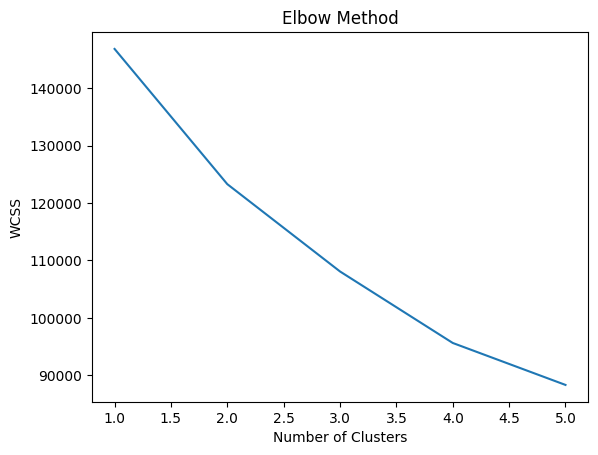

In [54]:
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();

In [59]:
optimal_n_clusters = 4 # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [60]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


# Assuming 'scaled_features' is your scaled data and you want 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_scaled)

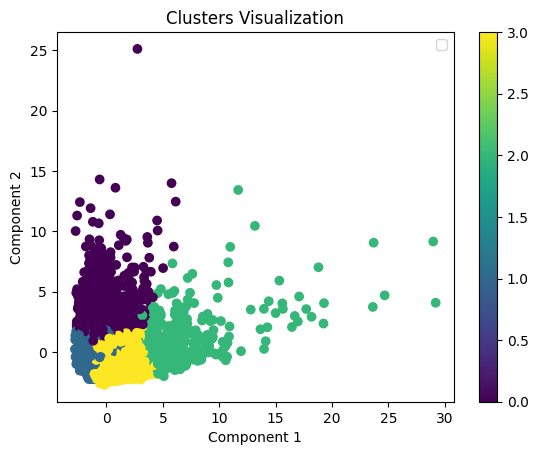

In [62]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_)
plt.title('Clusters Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.colorbar()
plt.show()

In [63]:
# Evaluate clustering results
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.197


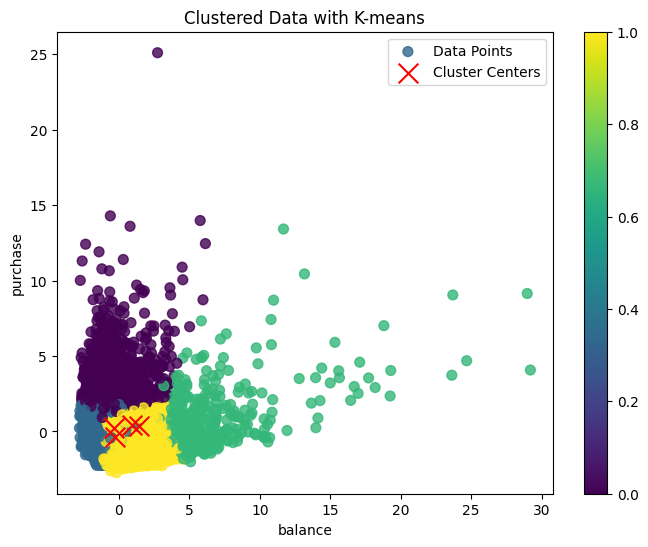

In [64]:
# Plotting the clustered data
plt.figure(figsize=(8, 6))
#plt.scatter(df['BALANCE'], df['PURCHASES'],  c=kmeans.labels_, s=50, cmap='viridis', alpha=0.8, label='Data Points')
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_,  s=50, cmap='viridis', alpha=0.8, label='Data Points')

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Cluster Centers')

plt.title('Clustered Data with K-means')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.colorbar()
plt.show()
